# Optimizer

> Fill in a module description here

In [22]:
#| default_exp optimizer

In [23]:
#| hide
from nbdev.showdoc import *

# ask franck about this
import fastcore.all as fc


In [77]:
#| export
class Optimizer:
    def __init__(self, 
               gdf_samples_t0, # Dataframe with all sample values at t0
               id_name:str='loc_id'
               ):
        "Optimize the number of points for t. Provided the number of points to sample in t based on t-1, return values number of sample points."
        self.samples_to = gdf_samples_t0
        self.id_name = id_name

    def get_internal_metrics(self, df):
        "Get the metric values for polygon"
        metrics_df = df.groupby('loc_id')['value'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
        metrics_df.columns = ['loc_id', 'mean_value', 'median_value', 'min_value', 'max_value', 'std_value']
        return metrics_df
    
    def get_priority_ranking(self, metrics_df):
        "Get the priority ranking of the polygons based on the internal metrics"
        pass
        ranking_df = ranking_df
        return ranking_df
    
    def get_external_metrics(self, df, window_size:int=1):
        "Get the metric values for the neighborhood around the polygon"
        pass
        return df
    
    def optimize_sample_number(self, point_budget, initial_n_points, id:int, priority_ranking):
        "Optimize the number of points for polygon (id_name) based on samples in t and the metrics of the polygon and its neighborhood. Return the number of points to sample in t+1."
    
        proposed_n_points = initial_n_points
        
        return proposed_n_points
    


SyntaxError: parameter without a default follows parameter with a default (3440003950.py, line 22)

In [41]:
#| hide
import nbdev; nbdev.nbdev_export()

### How to use

<Axes: >

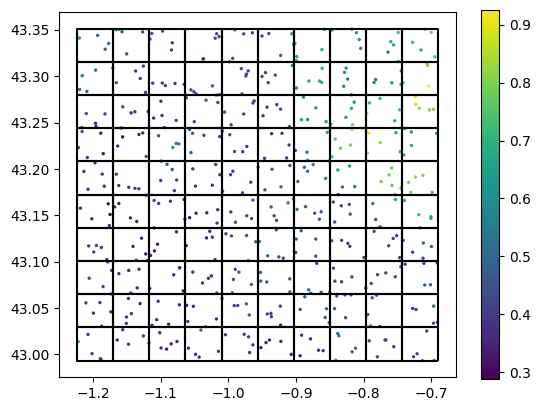

In [76]:

from trufl.utils import gridder
from trufl.sampler import Sampler
import pandas as pd

fname_raster = './files/ground-truth-02-4326-simulated.tif'
initial_n_pts = 5
loc_id = 35

gdf_grid = gridder(fname_raster, nrows=10, ncols=10)

sampling_locs = gdf_grid.loc[gdf_grid.loc_id == loc_id].sample_points(initial_n_pts)

sampler = Sampler(fname_raster)
gdf_samples = sampler.sample(sampling_locs)

optimizer = Optimizer(gdf_samples)
metrics = optimizer.get_internal_metrics(df=gdf_samples)
ranking = optimizer.get_priority_ranking(metrics)


loc_ids = gdf_grid.loc_id.values
n_planned_list = []

for loc_id in loc_ids:
    n_planned = optimizer.optimize_sample_number(point_budget=100, initial_n_points=initial_n_pts, id=loc_id, priority_ranking = ranking)
    n_planned_list.append(n_planned)

loc_planned = zip(loc_ids, n_planned_list)
# when the number of points for t is known, the number of points for t+1 can be optimized
samples_t0 = []
for loc_id, n in loc_planned:    
    sampling_locs = gdf_grid.loc[gdf_grid.loc_id == loc_id].sample_points(n)
    gdf_samples = sampler.sample(sampling_locs)
    samples_t0.append(gdf_samples)

gdf_samples_t = pd.concat(samples_t0)
ax = gdf_samples_t.plot(column='value', s=2, legend=True)
gdf_grid.boundary.plot(color='black', ax=ax)

In [ ]:
import pandas as pd
import numpy as np



